In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp
import sys
import os
import importlib.util
import importlib
import gurobipy as gp

# モジュールを強制的に再ロード（古いキャッシュをクリア）
if 'code' in sys.modules:
    del sys.modules['code']
# サブモジュールも削除
for module_name in list(sys.modules.keys()):
    if module_name.startswith('code.'):
        del sys.modules[module_name]

current_dir = os.getcwd()
spec = importlib.util.spec_from_file_location("code", os.path.join(current_dir, "code", "__init__.py"))
code_module = importlib.util.module_from_spec(spec)
sys.modules["code"] = code_module
spec.loader.exec_module(code_module)

# サブモジュールも再ロード
importlib.reload(code_module)

make_tensor_grid_2d = code_module.make_tensor_grid_2d
make_tensor_grid_3d = code_module.make_tensor_grid_3d
product_beta_density = code_module.product_beta_density
solve_mechanism = code_module.solve_mechanism
solve_mechanism_iterative = code_module.solve_mechanism_iterative
solve_dual = code_module.solve_dual
discretize_signed_measure = code_module.discretize_signed_measure
build_cost_matrix = code_module.build_cost_matrix
classify_region = code_module.classify_region
plot_polyhedral_regions = code_module.plot_polyhedral_regions

print("モジュールを再ロードしました")

モジュールを再ロードしました


In [2]:
home_license = os.path.expanduser('~/gurobi.lic')
os.environ['GRB_LICENSE_FILE'] = home_license

SOLVER = pulp.GUROBI(msg=True)

# ケース1

In [28]:
# ケース1: 財a, 財b, シナジーはBeta(1,1)
NX, NY, NZ = 20, 20, 20
BETA_PARAMS = [
    (1.0, 1.0),
    (1.0, 1.0),
    (1.0, 1.0),
]

points, weights = make_tensor_grid_3d(NX, NY, NZ, BETA_PARAMS)
print(f"#types = {len(points)}")

#types = 8000


In [29]:
status, obj_val, u_sol, p_sol, n_iter = solve_mechanism_iterative(
    points, weights, grid_sizes=(NX, NY, NZ), solver=SOLVER
)

print("LP status:", status)
print("Optimal revenue:", obj_val)
print(f"Number of iterations: {n_iter}")


Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 69600 rows, 32000 columns and 192800 nonzeros (Max)
Model fingerprint: 0x88b5f3bb
Model has 32000 linear objective coefficients
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [3e-06, 1e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.04s
Presolved: 69593 rows, 32000 columns, 192835 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.14s

Barrier statistics:
 AA' NZ     : 5.919e+04
 Factor NZ  : 9.742e+05 (roughly 34 MB of memory)
 Factor Ops : 2.704e+08 (less than 1 second per iteration)
 Threads    : 6

          

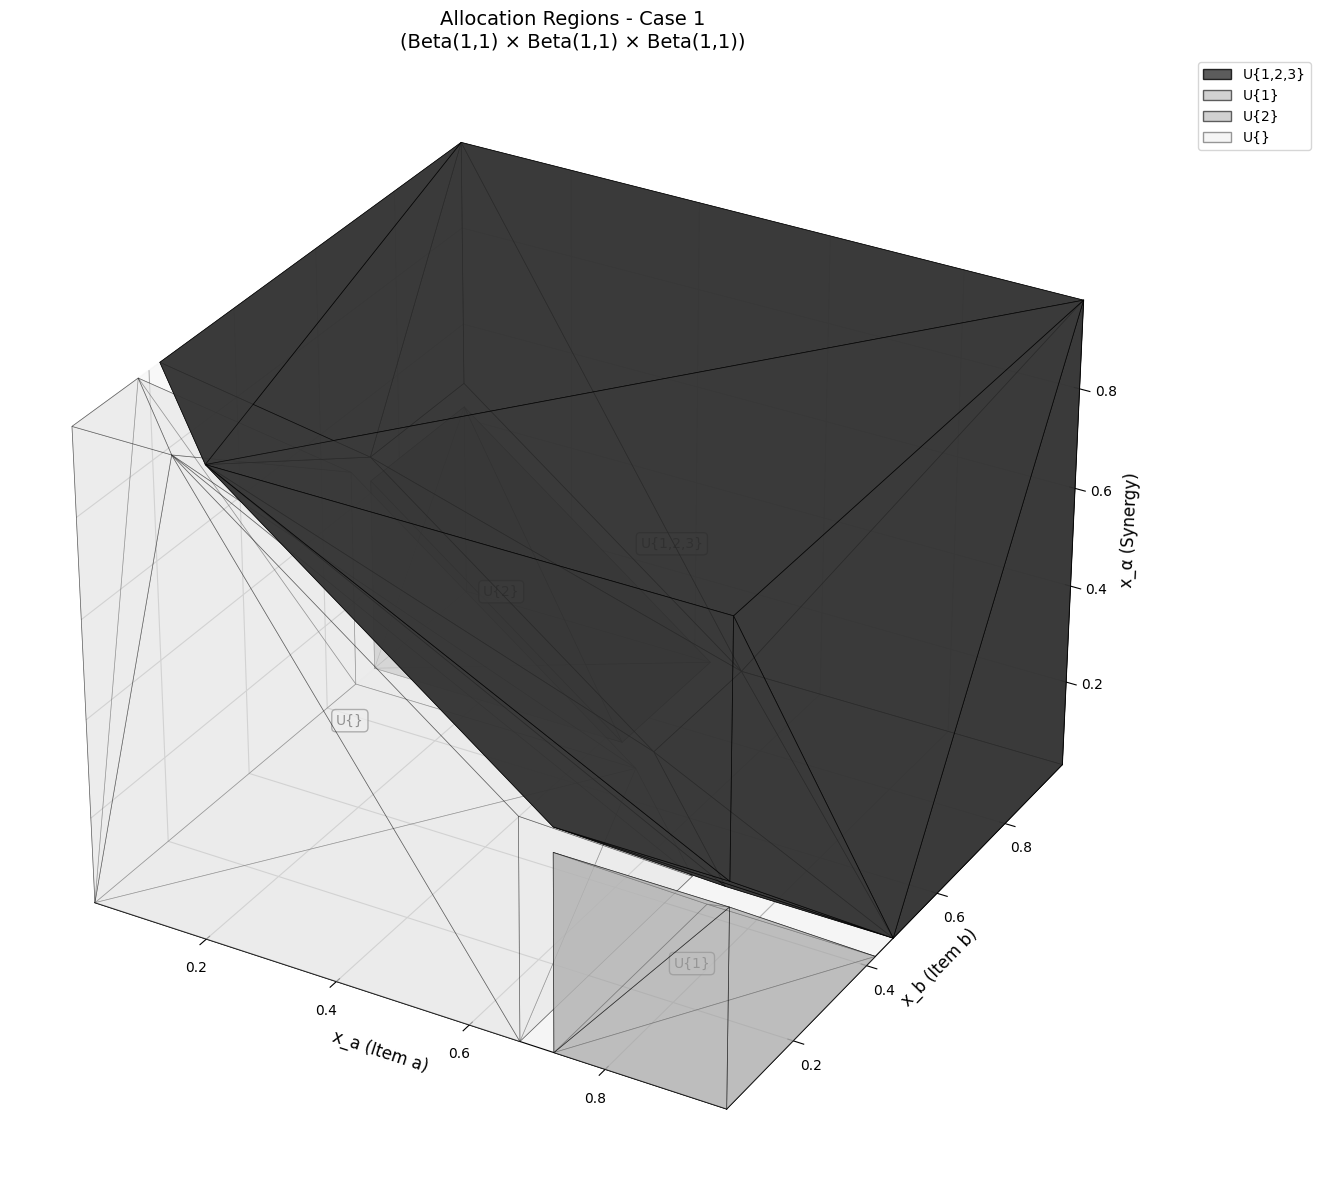

領域の統計:
  U{1,2,3}: 5500 点
  U{1}: 270 点
  U{2}: 270 点
  U{}: 1960 点


In [30]:
# ケース1の多面体領域可視化（関数を使用）
points_arr = np.array(points)
p_arr = np.array(p_sol)
q_arr = p_arr[2]

region_groups = plot_polyhedral_regions(
    points_arr, p_arr, q_arr, 
    title="Allocation Regions - Case 1\n(Beta(1,1) × Beta(1,1) × Beta(1,1))"
)


# ケース2

In [23]:
# ケース2: 財a, 財bはBeta(1,1)、シナジーαはU[-1,0]
NX2, NY2, NZ2 = 10, 10, 10
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 0)},
]

In [24]:
points2, weights2 = make_tensor_grid_3d(NX2, NY2, NZ2, BETA_PARAMS_MIXED)
print(f"#types = {len(points2)}")
print("ex. first point, weight =", points2[0], weights2[0])

status2, obj_val2, u_sol2, p_sol2, n_iter2 = solve_mechanism_iterative(
    points2, weights2, grid_sizes=(NX2, NY2, NZ2), solver=SOLVER
)

print("LP status:", status2)
print("Optimal revenue:", obj_val2)
print(f"Number of iterations: {n_iter2}")


#types = 1000
ex. first point, weight = (0.05, 0.05, -0.95) 0.001
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 8400 rows, 4000 columns and 23200 nonzeros (Max)
Model fingerprint: 0xb7b6ab1f
Model has 4000 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e-05, 1e-03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.01s
Presolved: 8393 rows, 4000 columns, 23235 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.1810220e-01   2.634528e+02   0.000000e+00      0s
    2450    4.6042292e-01   0.000000e+00   0.000000e+00      0s

Solved in 2450 iterations and 0.09 seconds (0.

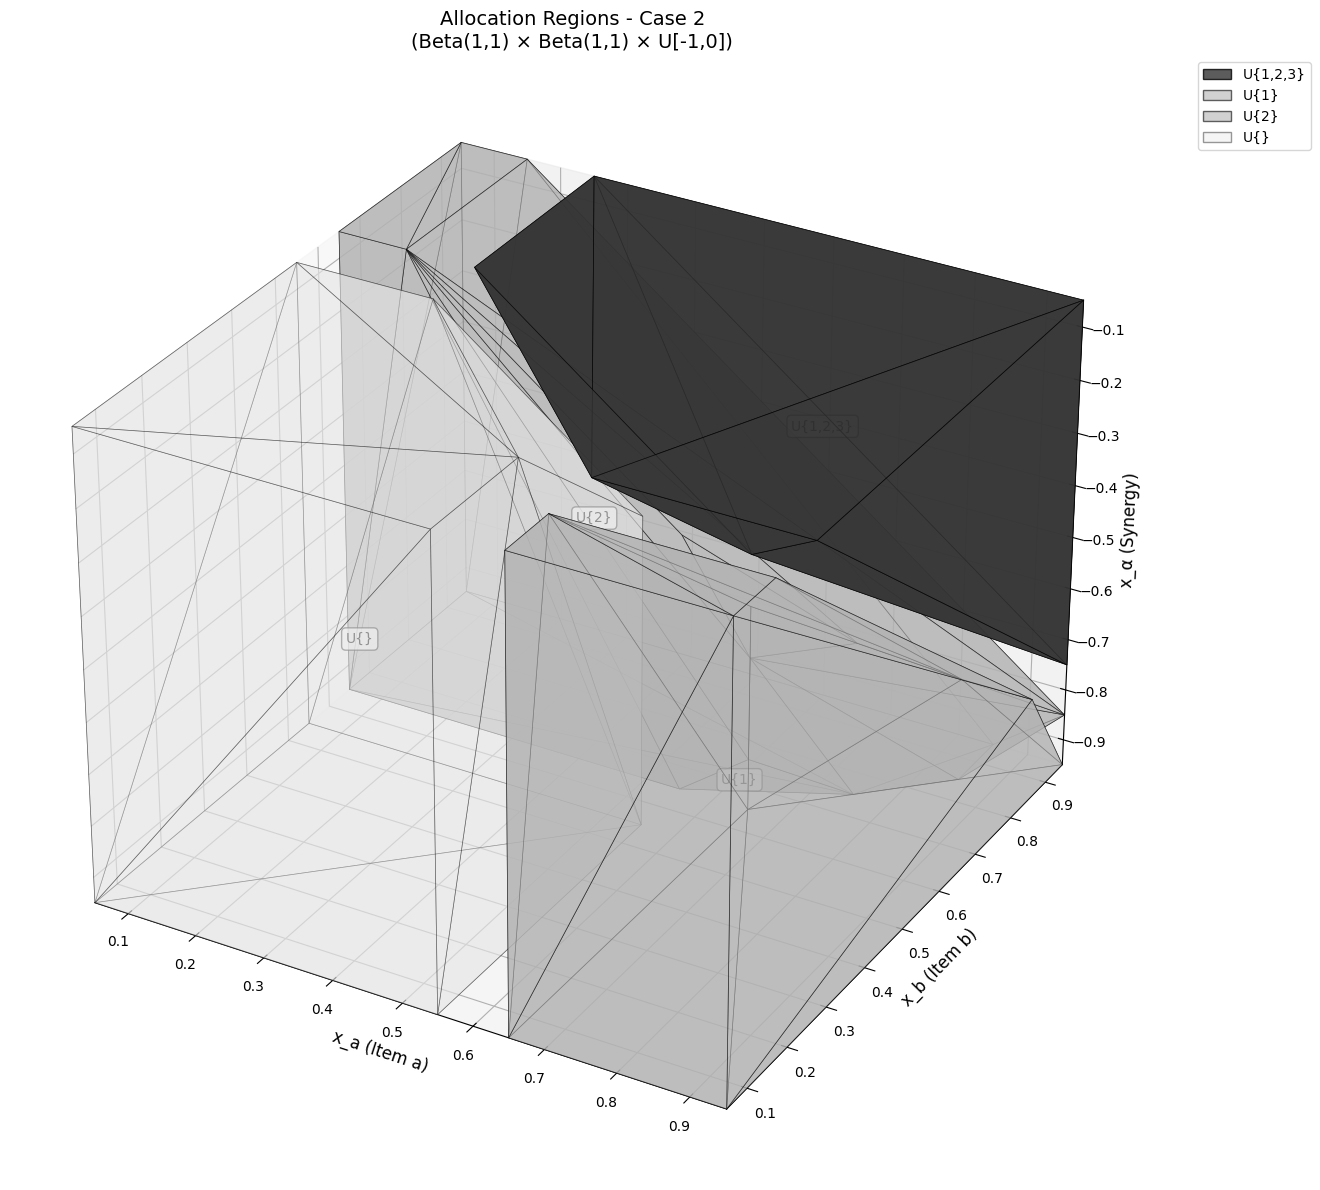

領域の統計:
  U{1,2,3}: 184 点
  U{1}: 233 点
  U{2}: 233 点
  U{}: 350 点


In [25]:
# ケース2の多面体領域可視化（関数を使用）
points_arr2 = np.array(points2)
p_arr2 = np.array(p_sol2)
q_arr2 = p_arr2[2]

region_groups2 = plot_polyhedral_regions(
    points_arr2, p_arr2, q_arr2,
    title="Allocation Regions - Case 2\n(Beta(1,1) × Beta(1,1) × U[-1,0])"
)


# ケース3

In [3]:
# ケース3: 財a, 財bはBeta(1,1)、シナジーαはU[-1,1]
NX3, NY3, NZ3 = 10, 10, 20
BETA_PARAMS_MIXED = [
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'beta', 'params': (1.0, 1.0), 'range': (0, 1)},
    {'type': 'uniform', 'range': (-1, 1)},
]

In [4]:
points3, weights3 = make_tensor_grid_3d(NX3, NY3, NZ3, BETA_PARAMS_MIXED)
print(f"#types = {len(points3)}")
print("ex. first point, weight =", points3[0], weights3[0])

status3, obj_val3, u_sol3, p_sol3, n_iter3 = solve_mechanism_iterative(
    points3, weights3, grid_sizes=(NX3, NY3, NZ3), solver=SOLVER
)

print("LP status:", status3)
print("Optimal revenue:", obj_val3)
print(f"Number of iterations: {n_iter3}")

#types = 2000
ex. first point, weight = (0.05, 0.05, -0.95) 0.0005
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 17000 rows, 8000 columns and 47000 nonzeros (Max)
Model fingerprint: 0xb65e0dd0
Model has 8000 linear objective coefficients
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [2e-05, 5e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 7 rows and 0 columns
Presolve time: 0.01s
Presolved: 16993 rows, 8000 columns, 47035 nonzeros

Concurrent LP optimizer: primal simplex, dual sim

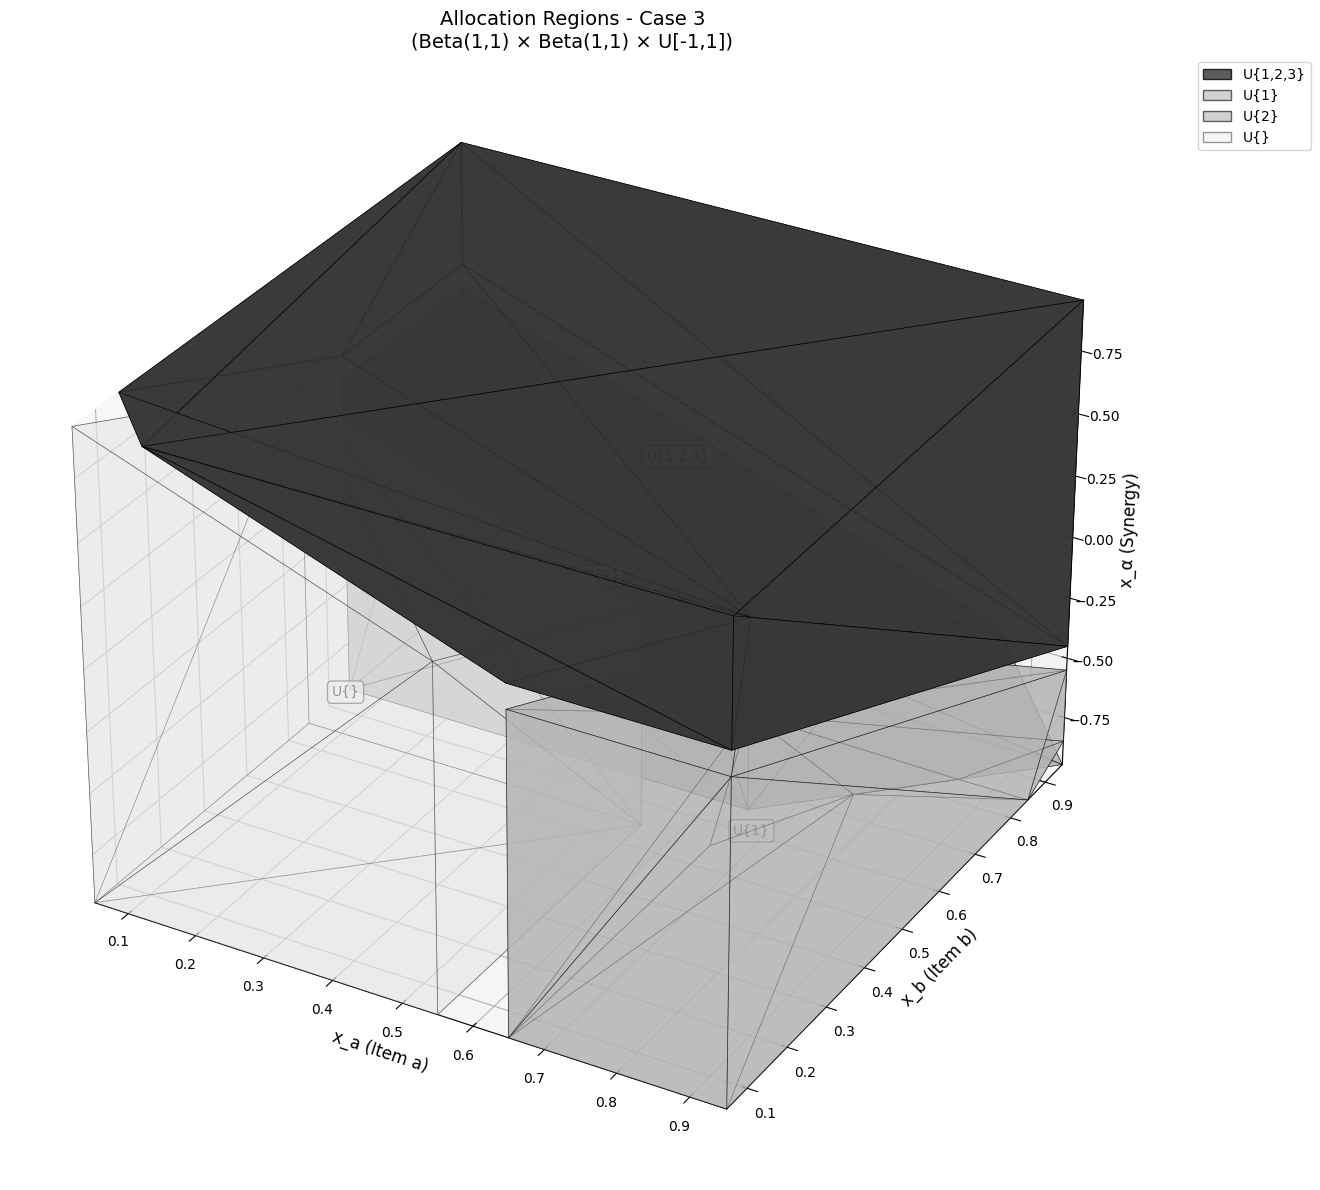

領域の統計:
  U{1,2,3}: 794 点
  U{1}: 338 点
  U{2}: 328 点
  U{}: 540 点


In [5]:
# ケース3の多面体領域可視化（関数を使用）
points_arr3 = np.array(points3)
p_arr3 = np.array(p_sol3)
q_arr3 = p_arr3[2]

region_groups3 = plot_polyhedral_regions(
    points_arr3, p_arr3, q_arr3,
    title="Allocation Regions - Case 3\n(Beta(1,1) × Beta(1,1) × U[-1,1])"
)
